
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./SimplePETSc.ipynb" download="SimplePETSc.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=SimplePETSc.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Notebooks/SimplePETSc.py"><img src="https://img.shields.io/static/v1?label=Source:&message=SimplePETSc.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Notebooks/SimplePETSc.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

The following shows running a simple steady-state diffusion benchmark running on 2 cores.

In [1]:
import os
from pathlib import Path
from subprocess import run

import numpy as np
import ogstools as ot

In [2]:
prj_name = "square_1e1_neumann"
data_dir = os.environ.get("OGS_DATA_DIR", "../../../Data")
prj_file = f"{data_dir}/EllipticPETSc/{prj_name}.prj"

In [3]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

command = f"mpirun --bind-to none -np 2 ogs {prj_file} > out.txt"
print(command)
run(command, shell=True, check=True)

mpirun --bind-to none -np 2 ogs /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/ogs/Tests/Data/EllipticPETSc/square_1e1_neumann.prj > out.txt


CompletedProcess(args='mpirun --bind-to none -np 2 ogs /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/ogs/Tests/Data/EllipticPETSc/square_1e1_neumann.prj > out.txt', returncode=0)

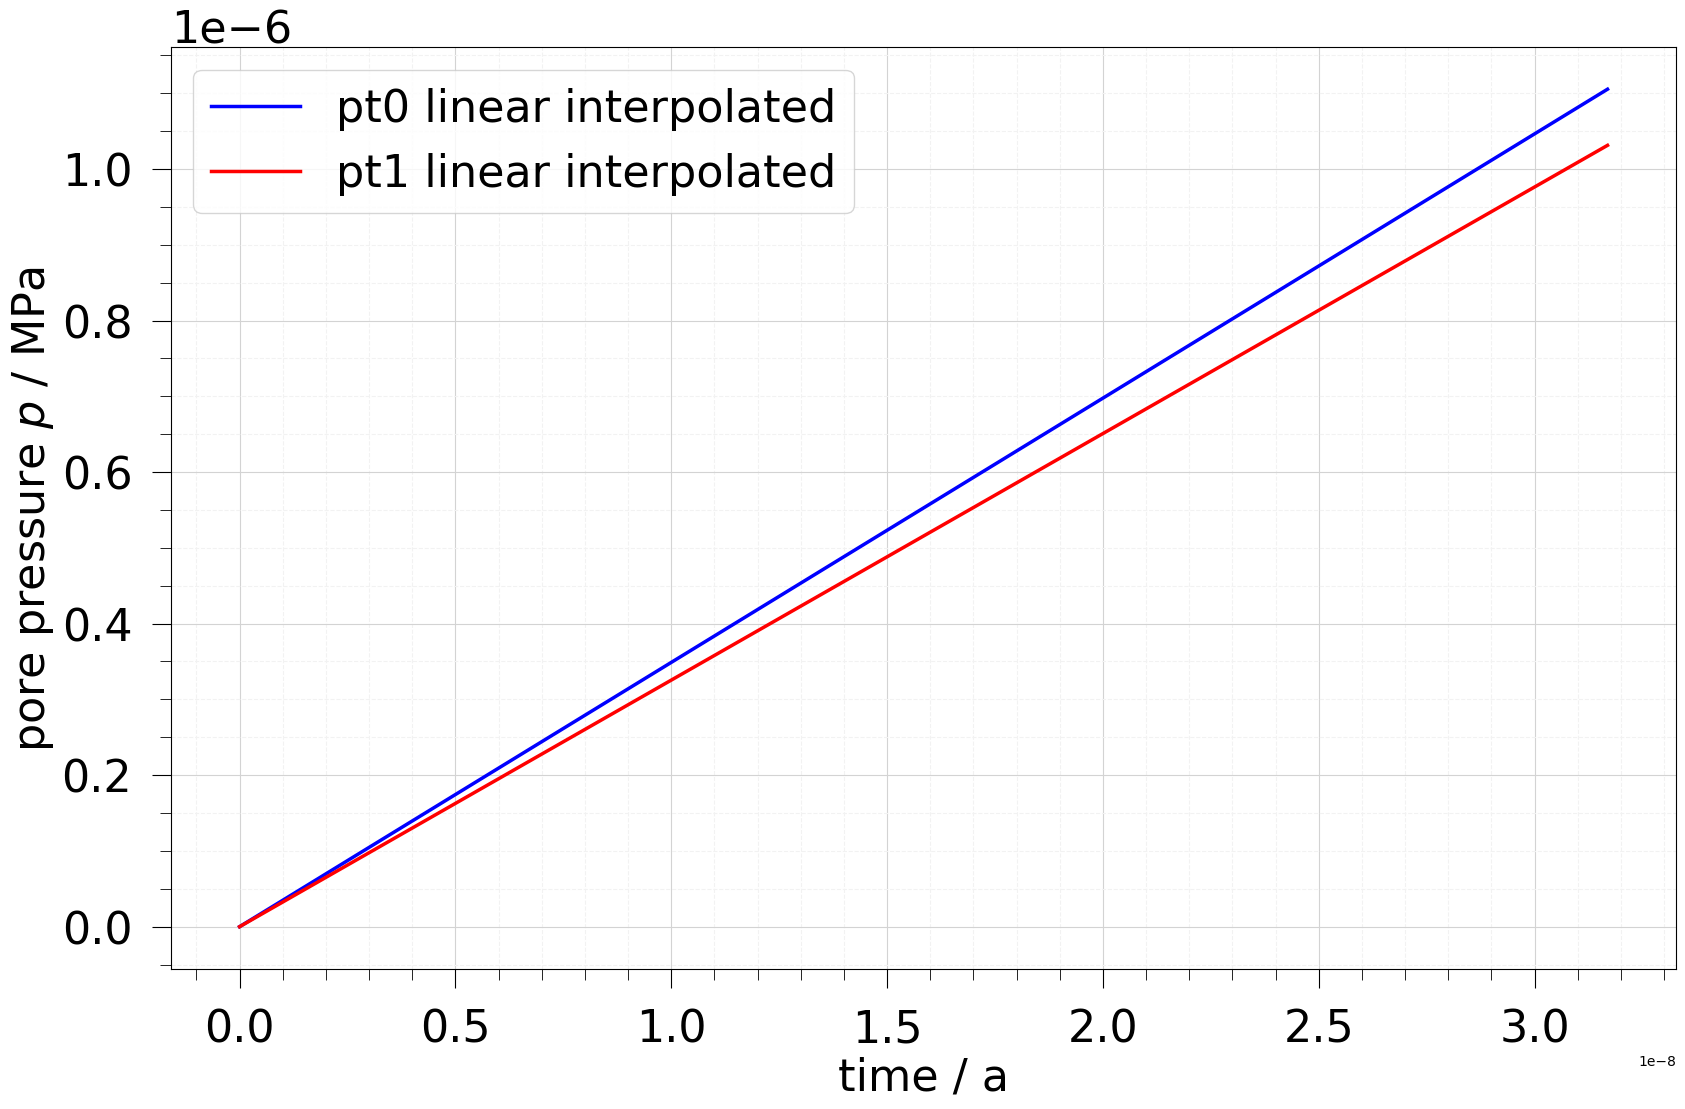

In [4]:
mesh_series = ot.MeshSeries(f"{prj_name}.pvd").scale(time=("s", "a"))
points_coords = np.array([[0.3, 0.5, 0.0], [0.24, 0.21, 0.0]])
labels = [f"{label} linear interpolated" for label in ["pt0", "pt1"]]

ms_pts = ot.MeshSeries.extract_probe(mesh_series, points_coords)
fig = ot.plot.line(
    ms_pts, "time", ot.variables.pressure, labels=labels, colors=["b", "r"]
)